In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
def parse_file(fn):
    date_format = "%d %b %Y %H:%M:%S %z"
    rows = []
    with open(fn) as fl:
        x = fl.readline()
        while x:
            x = x[:-1]
            if 'Health' in x:
                date = x.split('Health')[0].strip()[:-1]
                rest = x.replace(date,'')[1:].strip()
                date = date.replace('Mai','May').replace("CEST", "+0200")
                date = ' '.join(date.split(' ')[1:])
                date = datetime.strptime(date, date_format)
                res = {'date': date, 'success': False if 'failed' in rest else True}
                if not 'failed' in rest:
                    s = rest.replace('Health check passed - count -------','').strip()
                    while(s.startswith('-')):
                        s = s[1:].strip()
                    s = int(s.split(' ')[0])
                    res['count'] = s
                rows.append(res)
            x = fl.readline()
    return pd.DataFrame(rows).set_index('date')


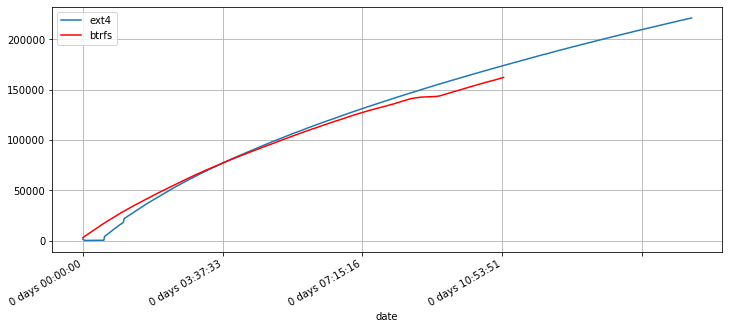

In [44]:
plt.figure(figsize=(12,5))
dfr1 = parse_file('results/atlas-ext4-kvm.log')
dfr1.index = (dfr1.index - dfr1.index.min())
ax1 = dfr1[dfr1.success]['count'].plot(grid=True, label='ext4')
dfr2 = parse_file('logfile.log')
dfr2.index = (dfr2.index - dfr2.index.min())
ax2 = dfr2[dfr2.success]['count'].plot(grid=True, label='btrfs', color='red')
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

<AxesSubplot:xlabel='date'>

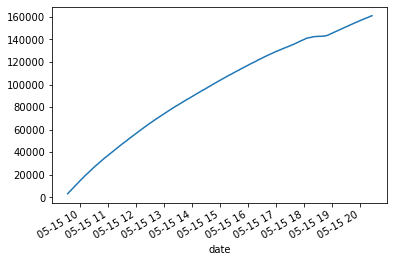